<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment3April3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You play golf every Sunday and you invite your best friend, Arthur to come with you every time. Arthur sometimes comes to join but sometimes not. For him, it depends on a number of factors for example, , ,  and . We'll use the dataset of last two week to predict whether or not Arthur will join you to play golf. An intuitive way to do this is through a Decision Tree.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
weekly_data1=pd.read_csv('playgolf_data2.csv')
weekly_data1

,Day,Outlook,Temperature,Humidity,Wind,PlayGolf
0,D1,Sunny,Mild,80,No,Yes
1,D2,Sunny,Hot,75,Yes,No
2,D3,Overcast,Hot,77,No,Yes
3,D4,Rainy,Cool,70,No,Yes
4,D5,Overcast,Cool,72,Yes,Yes
5,D6,Sunny,Mild,77,No,No
6,D7,Sunny,Cool,70,No,Yes
7,D8,Rainy,Mild,69,No,Yes
8,D9,Sunny,Mild,65,Yes,Yes
9,D10,Overcast,Mild,77,Yes,Yes


<Axes: xlabel='Outlook', ylabel='Count'>

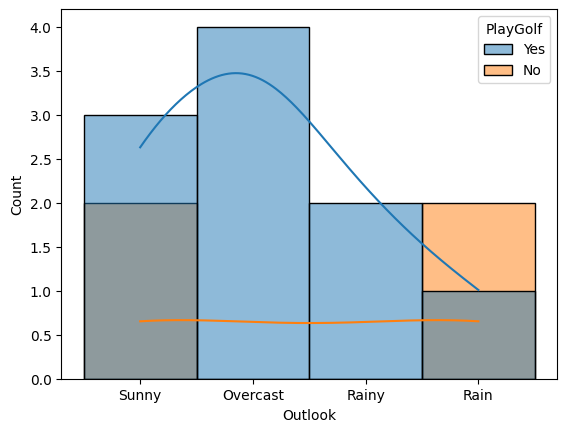

In [3]:
sns.histplot(x='Outlook',hue='PlayGolf',data=weekly_data1,kde=True)

<Axes: xlabel='Temperature', ylabel='Count'>

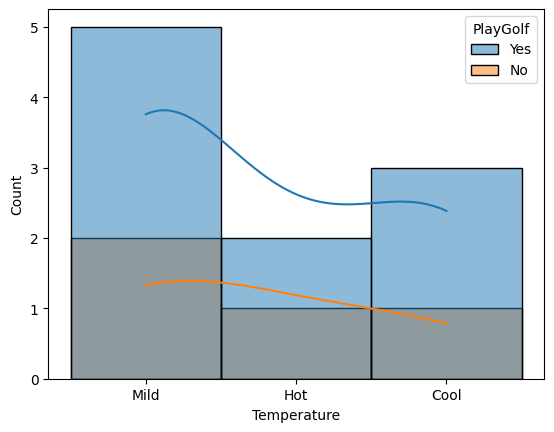

In [4]:
sns.histplot(x='Temperature',hue='PlayGolf',data=weekly_data1,kde=True)

<Axes: xlabel='Humidity', ylabel='Count'>

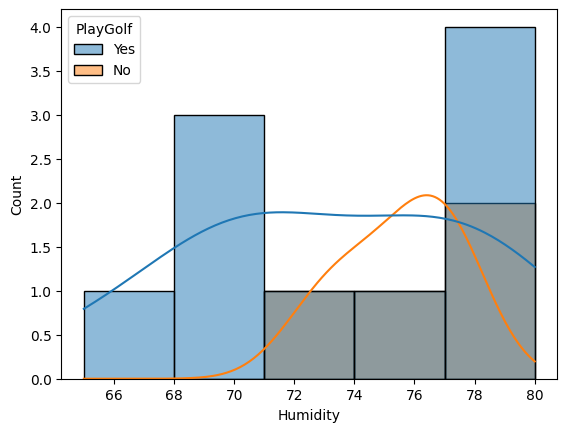

In [5]:
sns.histplot(x='Humidity',hue='PlayGolf',data=weekly_data1,kde=True)

<Axes: xlabel='Wind', ylabel='Count'>

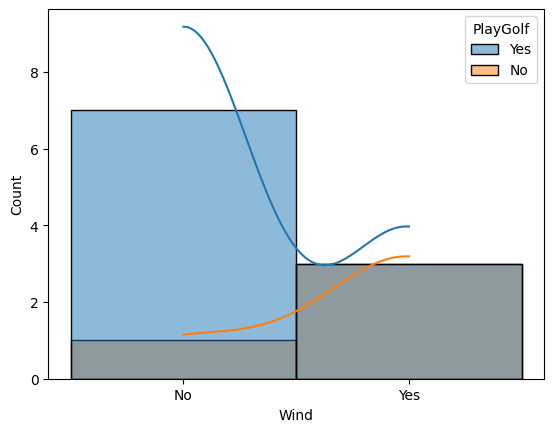

In [6]:
sns.histplot(x='Wind',hue='PlayGolf',data=weekly_data1,kde=True)

In [7]:
encoder=LabelEncoder()
weekly_data1['encoded_Outlook']=encoder.fit_transform(weekly_data1['Outlook'])
weekly_data1['encoded_Temperature']=encoder.fit_transform(weekly_data1['Temperature'])
weekly_data1['encoded_Wind']=encoder.fit_transform(weekly_data1['Wind'])
weekly_data1['PlayGolf']=encoder.fit_transform(weekly_data1['PlayGolf'])
weekly_data1

,Day,Outlook,Temperature,Humidity,Wind,PlayGolf,encoded_Outlook,encoded_Temperature,encoded_Wind
0,D1,Sunny,Mild,80,No,1,3,2,0
1,D2,Sunny,Hot,75,Yes,0,3,1,1
2,D3,Overcast,Hot,77,No,1,0,1,0
3,D4,Rainy,Cool,70,No,1,2,0,0
4,D5,Overcast,Cool,72,Yes,1,0,0,1
5,D6,Sunny,Mild,77,No,0,3,2,0
6,D7,Sunny,Cool,70,No,1,3,0,0
7,D8,Rainy,Mild,69,No,1,2,2,0
8,D9,Sunny,Mild,65,Yes,1,3,2,1
9,D10,Overcast,Mild,77,Yes,1,0,2,1


In [8]:
correlation=weekly_data1.corr()['PlayGolf'].drop('PlayGolf')
correlation

<ipython-input-8-c4cfc5b6312f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=weekly_data1.corr()['PlayGolf'].drop('PlayGolf')


Humidity              -0.255398
encoded_Outlook       -0.219089
encoded_Temperature   -0.026261
encoded_Wind          -0.410792
Name: PlayGolf, dtype: float64

In [9]:
X=weekly_data1[['encoded_Outlook','Humidity','encoded_Temperature','encoded_Wind']]
y=weekly_data1['PlayGolf']

In [10]:
X

,encoded_Outlook,Humidity,encoded_Temperature,encoded_Wind
0,3,80,2,0
1,3,75,1,1
2,0,77,1,0
3,2,70,0,0
4,0,72,0,1
5,3,77,2,0
6,3,70,0,0
7,2,69,2,0
8,3,65,2,1
9,0,77,2,1


In [11]:
y

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
Name: PlayGolf, dtype: int64

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
treeclf=DecisionTreeClassifier(max_depth=2)
treeclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [13]:
y_pred=treeclf.predict(X_test)
print(f'Predictions of whether Arthur will play Golf or not:{y_pred}')

Predictions of whether Arthur will play Golf or not:[0 0 1]


In [14]:
Accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of our model :{Accuracy}')

Accuracy of our model :0.6666666666666666


In [15]:
y_pred2=treeclf.predict(X_train)
acc2=accuracy_score(y_train,y_pred2)
acc2

0.9090909090909091

In [16]:
weekly_data2=pd.read_csv('playgolf_data.csv')
weekly_data2

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


<Axes: xlabel='Outlook', ylabel='Count'>

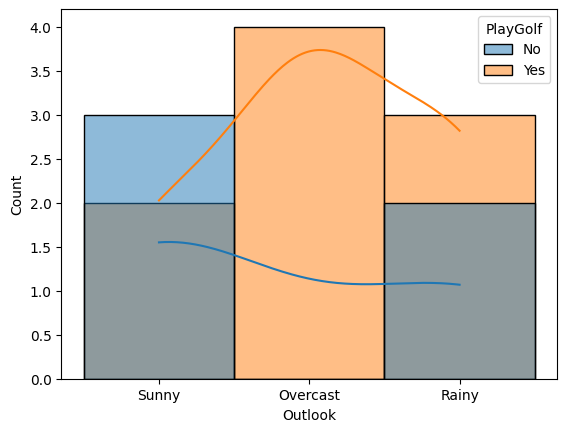

In [17]:
sns.histplot(x='Outlook',hue='PlayGolf',data=weekly_data2,kde=True)

<Axes: xlabel='Temperature', ylabel='Count'>

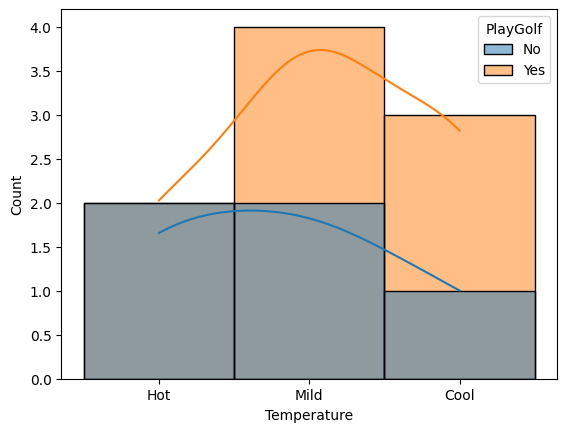

In [18]:
sns.histplot(x='Temperature',hue='PlayGolf',data=weekly_data2,kde=True)

<Axes: xlabel='Humidity', ylabel='Count'>

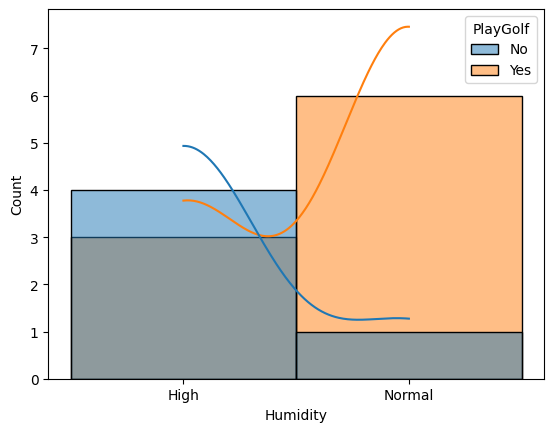

In [19]:
sns.histplot(x='Humidity',hue='PlayGolf',data=weekly_data2,kde=True)

<Axes: xlabel='Wind', ylabel='Count'>

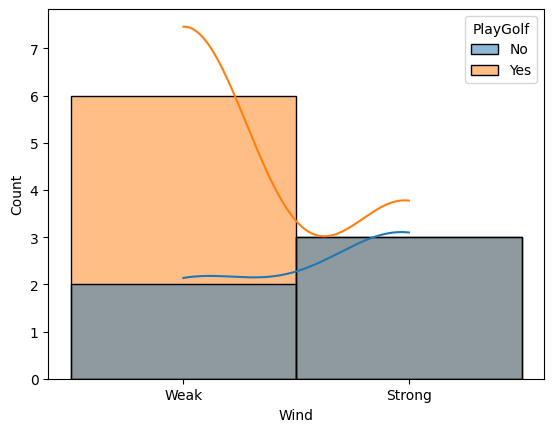

In [20]:
sns.histplot(x='Wind',hue='PlayGolf',data=weekly_data2,kde=True)

In [21]:
encoder=LabelEncoder()
weekly_data2['encoded_Outlook']=encoder.fit_transform(weekly_data2['Outlook'])
weekly_data2['encoded_Temperature']=encoder.fit_transform(weekly_data2['Temperature'])
weekly_data2['encoded_Wind']=encoder.fit_transform(weekly_data2['Wind'])
weekly_data2['PlayGolf']=encoder.fit_transform(weekly_data2['PlayGolf'])
weekly_data2['encoded_Humidity']=encoder.fit_transform(weekly_data2['Humidity'])
weekly_data2

,Outlook,Temperature,Humidity,Wind,PlayGolf,encoded_Outlook,encoded_Temperature,encoded_Wind,encoded_Humidity
0,Sunny,Hot,High,Weak,0,2,1,1,0
1,Sunny,Hot,High,Strong,0,2,1,0,0
2,Overcast,Hot,High,Weak,1,0,1,1,0
3,Rainy,Mild,High,Weak,1,1,2,1,0
4,Rainy,Cool,Normal,Weak,1,1,0,1,1
5,Rainy,Cool,Normal,Strong,0,1,0,0,1
6,Overcast,Cool,Normal,Strong,1,0,0,0,1
7,Sunny,Mild,High,Weak,0,2,2,1,0
8,Sunny,Cool,Normal,Weak,1,2,0,1,1
9,Rainy,Mild,Normal,Weak,1,1,2,1,1


In [22]:
X=weekly_data2[['encoded_Outlook','encoded_Humidity','encoded_Temperature','encoded_Wind']]
y=weekly_data2['PlayGolf']

In [23]:
X

,encoded_Outlook,encoded_Humidity,encoded_Temperature,encoded_Wind
0,2,0,1,1
1,2,0,1,0
2,0,0,1,1
3,1,0,2,1
4,1,1,0,1
5,1,1,0,0
6,0,1,0,0
7,2,0,2,1
8,2,1,0,1
9,1,1,2,1


In [24]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayGolf, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
treeclf=DecisionTreeClassifier()
treeclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=treeclf.predict(X_test)
print(f'Predictions of whether Arthur will play Golf or not:{y_pred}')

Predictions of whether Arthur will play Golf or not:[1 1 0]


In [27]:
Accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of our model :{Accuracy}')

Accuracy of our model :1.0


In [28]:
y_pred2=treeclf.predict(X_train)
acc2=accuracy_score(y_train,y_pred2)
acc2

1.0